In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for plots
sns.set(style='whitegrid')

# Load the data files
student_mat = pd.read_csv('student-mat.csv', sep=';')
student_por = pd.read_csv('student-por.csv', sep=';')


In [4]:
# Display first few rows
print(student_mat.head())
print(student_por.head())

# Get basic information
print(student_mat.info())
print(student_por.info())

# Statistical summary
print(student_mat.describe())
print(student_por.describe())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

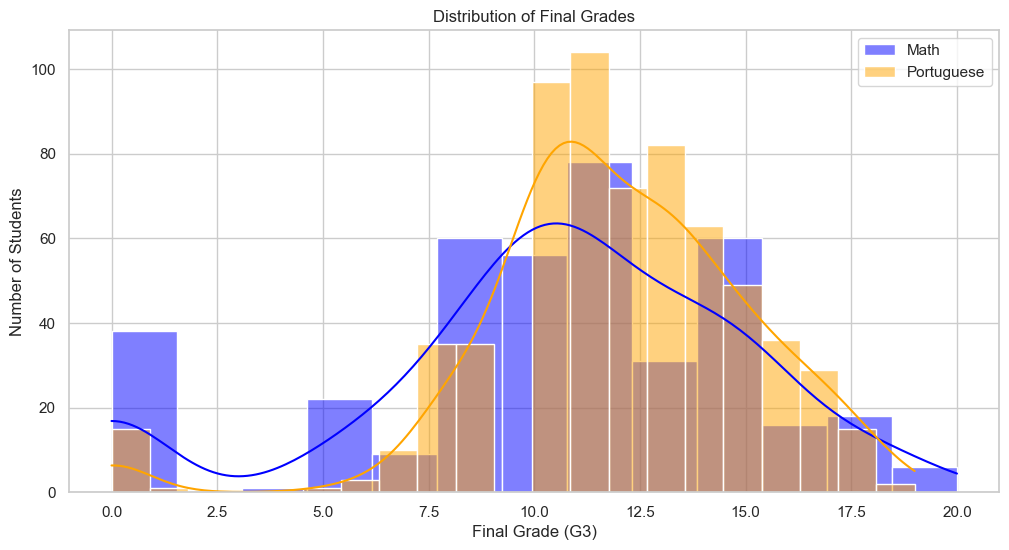

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(student_mat['G3'], color='blue', kde=True, label='Math')
sns.histplot(student_por['G3'], color='orange', kde=True, label='Portuguese')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.legend()
plt.show()


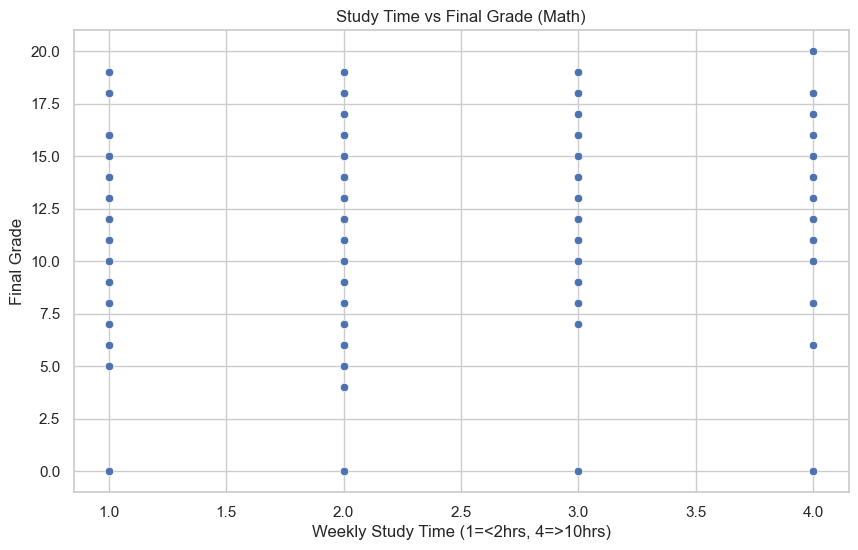

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='G3', data=student_mat)
plt.title('Study Time vs Final Grade (Math)')
plt.xlabel('Weekly Study Time (1=<2hrs, 4=>10hrs)')
plt.ylabel('Final Grade')
plt.show()


In [10]:
#Check for missing values in each column
missing_values = student_mat.isnull().sum()
print("Missing values per column:")
print(missing_values)

#Get dataset size (rows, columns)
print("\nDataset shape (rows, columns):", student_mat.shape)

Missing values per column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Dataset shape (rows, columns): (395, 33)


In [12]:
# Verify missing values handled
print("\nMissing values after handling:")
print(student_mat.isnull().sum())

# 4. Remove duplicate entries
original_row_count = student_mat.shape[0]
student_mat.drop_duplicates(inplace=True)
new_row_count = student_mat.shape[0]
print(f"\nDuplicates removed: {original_row_count - new_row_count}")
print("New dataset shape:", student_mat.shape)


Missing values after handling:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Duplicates removed: 0
New dataset shape: (395, 33)


In [14]:
# Calculate average final grade in maths (G3)
average_g3_math = student_mat['G3'].mean()
print(f"Average maths final grade (G3): {average_g3_math:.2f}")


Average maths final grade (G3): 10.42


In [16]:
# Count students with final grade above 15 in maths
count_above_15 = (student_mat['G3'] > 15).sum()
print(f"Number of students with maths final grade (G3) above 15: {count_above_15}")


Number of students with maths final grade (G3) above 15: 40


In [18]:
# Calculate Pearson correlation between study time and final grade in maths
correlation = student_mat['studytime'].corr(student_mat['G3'])
print(f"Correlation between study time and final grade (G3): {correlation:.2f}")


Correlation between study time and final grade (G3): 0.10


In [20]:
# Calculate average final grade in maths by gender
avg_by_gender = student_mat.groupby('sex')['G3'].mean()
print("Average final grade (G3) by gender:")
print(avg_by_gender)


Average final grade (G3) by gender:
sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


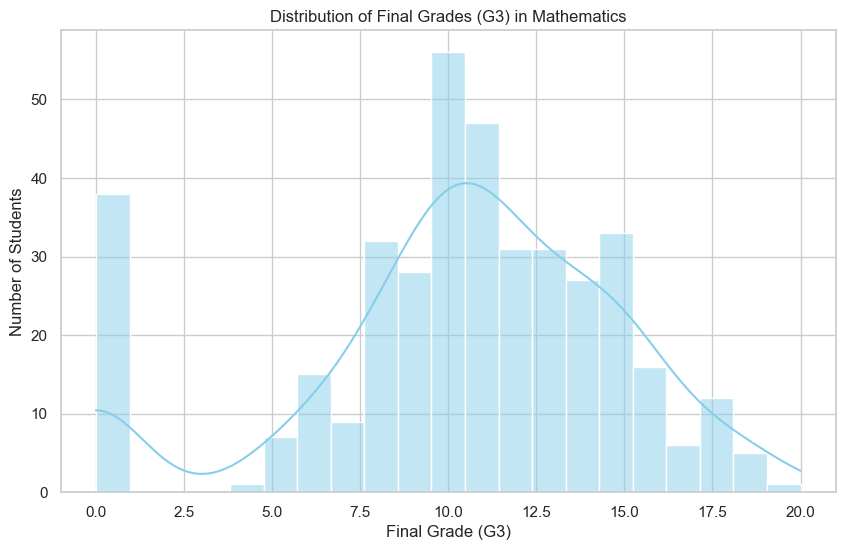

In [22]:
#Histogram of Final Grades (G3)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(student_mat['G3'], bins=21, color='skyblue', kde=True)
plt.title('Distribution of Final Grades (G3) in Mathematics')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.show()


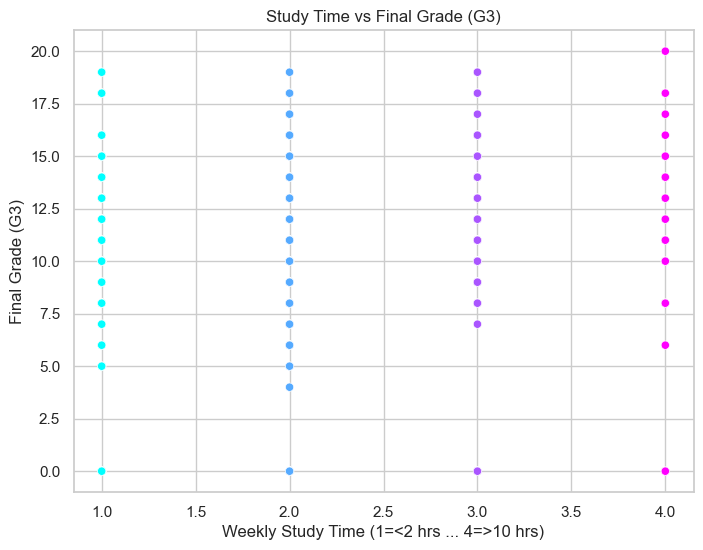

In [26]:
#catter Plot: Study Time vs Final Grade
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='G3', data=student_mat, hue='studytime', palette='cool', legend=False)
plt.title('Study Time vs Final Grade (G3)')
plt.xlabel('Weekly Study Time (1=<2 hrs ... 4=>10 hrs)')
plt.ylabel('Final Grade (G3)')
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_7084\1199525148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='G3', data=avg_scores_gender, palette='pastel')


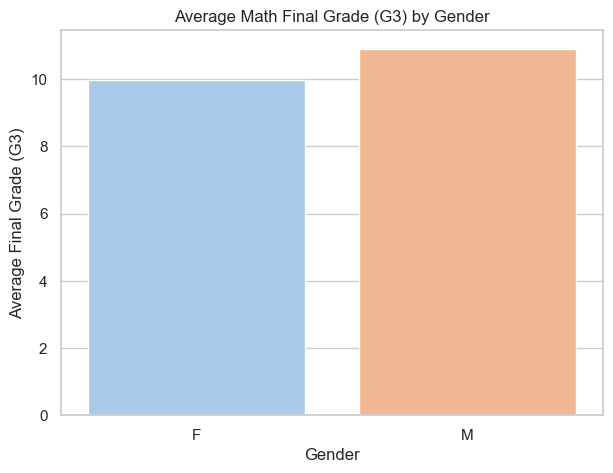

In [28]:
#Bar Chart: Average Scores by Gender
plt.figure(figsize=(7, 5))
avg_scores_gender = student_mat.groupby('sex')['G3'].mean().reset_index()
sns.barplot(x='sex', y='G3', data=avg_scores_gender, palette='pastel')
plt.title('Average Math Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()
